# Modélisation du nombre de buts par une loi de Poisson

Dans ce notebook, on va chercher à comprendre comment modéliser le nombre de buts marqués par match par une équipe.

In [1]:
%matplotlib inline

In [2]:
import pandas

On importe les données de la ligue 1 française

In [3]:
data = pandas.read_csv('data\\engsoccerdata-master\\data-raw\\france.csv', index_col=0, parse_dates=[1], infer_datetime_format=True)

In [4]:
data.head(6)

,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result
1,1933-07-01,1932,CA Paris (alt),AS Cannes,5-1,5,1,1,1,6,4,H
2,1933-07-01,1932,SC Fives Lille,FC Sete,4-2,4,2,1,1,6,2,H
3,1933-07-01,1932,Olympique Marseille,OGC Nice,4-0,4,0,1,1,4,4,H
4,1933-07-01,1932,SC Nimes,Olympique Lillois Lille,3-3,3,3,1,1,6,0,D
5,1933-07-01,1932,FC Antibes,Stade Rennes,1-1,1,1,1,1,2,0,D
6,1933-07-01,1932,Stade Olympique Montpellierain,Racing Club de France,1-0,1,0,1,1,1,1,H


Affichons quelques histogrammes concernants les buts marqués :

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009C55550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A1DC780>]], dtype=object)

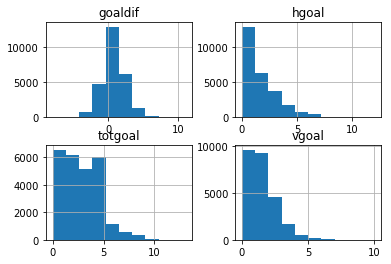

In [5]:
data[['hgoal','vgoal','totgoal','goaldif']].hist()

Il semble difficile d'identifier la loi que suit les buts marqués... Regardons sur une année fixée

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A667BE0>]], dtype=object)

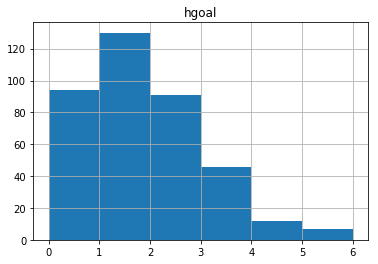

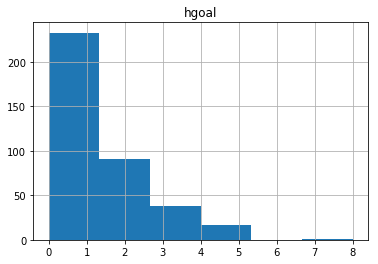

In [6]:
data[data.Season==2014][['hgoal']].hist(bins=6)
data[data.Season==2004][['hgoal']].hist(bins=6)

C'est mieux, il semble qu'il s'agit de lois de Poisson. Essayons d'ajuster cette loi sur nos données :

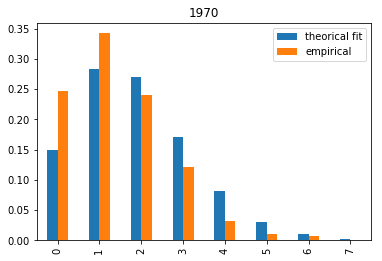

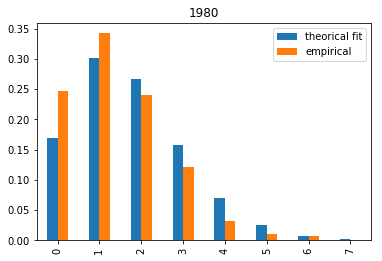

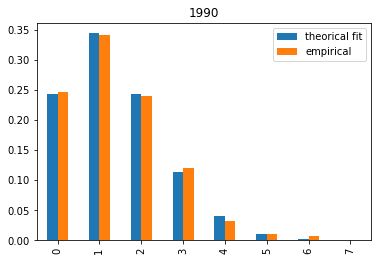

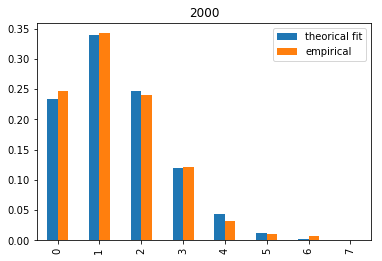

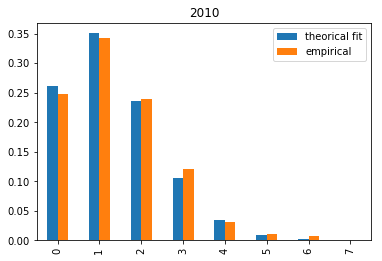

In [7]:
from scipy.stats import poisson

def plot_distributions(year):
    # on calcule la distribution theorique
    mu = data[data.Season==year][['hgoal']].mean()
    df = pandas.DataFrame(poisson.pmf(k=range(0,8),mu=mu))

    # on calcule celle empirique
    df2 = pandas.DataFrame(data[data.Season==2014][['hgoal']].hgoal.value_counts()).sort_index()
    df2 = df2 / df2.sum()

    #on merge les deux
    df_12 = df.merge(df2, how='outer', left_index=True, right_index=True)
    df_12.columns = ['theorical fit', 'empirical']

    #on affiche les deux histogrammes
    df_12.plot(kind='bar', title=year)
    
for year in [1970, 1980, 1990, 2000, 2010]:
    plot_distributions(year)

Conclusion : le nombre de buts marqués par l'équipe home suit bien une loi de poisson, mais de paramètre évoluant au fur et à mesure des années (le style de jeu se modifie, les charactéristiques des joueurs, etc.)

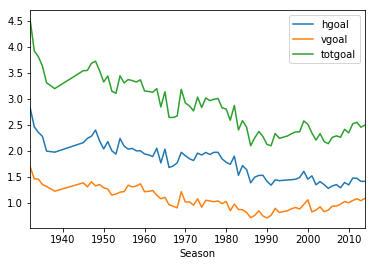

In [8]:
data.groupby(by=data.Season)["hgoal","vgoal","totgoal"].mean().plot()

# Comparaison par pays

Pour confirmer notre hypothèse sur l'ensemble des pays qu'on a disposition, on va afficher l'évolution du nombre de buts moyen en fonction des championnats. Pour cela, on récupère cette information sur chacun des datasets fournis.

In [9]:
france = pandas.read_csv('data\\engsoccerdata-master\\data-raw\\france.csv', index_col=0, parse_dates=[1], infer_datetime_format=True)
france['totgoal_france'] = france['totgoal']

england = pandas.read_csv('data\\engsoccerdata-master\\data-raw\\england.csv', parse_dates=[0], infer_datetime_format=True)
england['totgoal_england'] = england.hgoal + england.vgoal

germany = pandas.read_csv('data\\engsoccerdata-master\\data-raw\\germany.csv', parse_dates=[0], infer_datetime_format=True)
germany['totgoal_germany'] = germany.hgoal + germany.vgoal

holland = pandas.read_csv('data\\engsoccerdata-master\\data-raw\\holland.csv', parse_dates=[0], infer_datetime_format=True)
holland['totgoal_holland'] = holland.hgoal + holland.vgoal

italy = pandas.read_csv('data\\engsoccerdata-master\\data-raw\\italy.csv', parse_dates=[0], infer_datetime_format=True)
italy['totgoal_italy'] = italy.hgoal + italy.vgoal

spain = pandas.read_csv('data\\engsoccerdata-master\\data-raw\\spain.csv', parse_dates=[0], infer_datetime_format=True)
spain['totgoal_spain'] = spain.hgoal + spain.vgoal

C:\Users\Alexis\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


On aggrège par année chaque dataset

In [10]:
spain = spain[['Season','totgoal_spain']].groupby('Season').mean()
france = france[['Season','totgoal_france']].groupby('Season').mean()
england = england[['Season','totgoal_england']].groupby('Season').mean()
germany = germany[['Season','totgoal_germany']].groupby('Season').mean()
holland = holland[['Season','totgoal_holland']].groupby('Season').mean()
italy = italy[['Season','totgoal_italy']].groupby('Season').mean()

Et on rassemble toutes les données dans un unique dataframe

In [11]:
total = france
total = total.merge(spain, left_index=True, right_index=True, how ='outer')
total = total.merge(england, left_index=True, right_index=True, how ='outer')
total = total.merge(italy, left_index=True, right_index=True, how ='outer')
total = total.merge(holland, left_index=True, right_index=True, how ='outer')
total = total.merge(germany, left_index=True, right_index=True, how ='outer')

Finalement, on plot le tout :

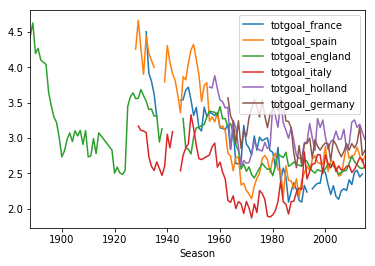

In [12]:
total.plot()

Cette modélisation par loi de Poisson est cohérente avec la nature des buts en football : ce sont des évênements rare, à priori indépendants le